In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
#import graphviz

In [2]:
covid = pd.read_csv('E:\ENEL 645 - DataMining\COVID-19_formatted_dataset.csv') #covid formatted dataset retrieved

In [3]:
#Mapping the positive and negative label to 0 and 1
covid["SARS-Cov-2 exam result"] = covid["SARS-Cov-2 exam result"].map({'positive':1, 'negative':0}) 


In [4]:
#Removing the first index column of covid formatted dataset
covid= covid.drop(covid.columns[0],axis = 1)


In [5]:
#Adding label column to the end of dataset
covid1= covid["SARS-Cov-2 exam result"]
covid = covid.drop(["SARS-Cov-2 exam result"],axis = 1)
covid = pd.concat((covid,covid1),axis = 1)


In [6]:
#Two sets of features to compare different decision tree classifier.
print(covid.columns[[1,3,5,7,9,11,13]])
print(covid.columns[[0,2,4,6,8,10,12,14]])

Index(['Hematocrit', 'Platelets', 'Red blood Cells',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Basophils',
       'Eosinophils', 'Monocytes'],
      dtype='object')
Index(['Patient age quantile', 'Hemoglobin', 'Mean platelet volume ',
       'Lymphocytes', 'Leukocytes', 'Mean corpuscular hemoglobin (MCH)',
       'Mean corpuscular volume (MCV)',
       'Red blood cell distribution width (RDW)'],
      dtype='object')


In [7]:
#Converting the covid dataset to numpy
covid1 = covid.to_numpy()

In [8]:
#Spliting the features and target columns
#x = covid1[:,[1,3,5,7,9,11,13]]
#x = covid1[:,[0,2,4,6,8,10,12,14]]
x = covid1[:,0:15]
y = covid1[:,-1]

In [9]:
print(covid.shape)

(598, 16)


In [10]:
#Split into training, testing sets with the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state = 0)

In [11]:
# Using this code, calulated the accuracy value for different tree depths
list1 = []
for i in (2,3,4,5,6,9,10):
    clf = tree.DecisionTreeClassifier( max_depth=i, random_state=0)
    clf = clf.fit(x_train, y_train)
    list1.append(clf)
    #clf="clf_d"+str(i)
    y_train_pred = clf.predict(x_train)
    #print('Predicting the class using train data when max_depth = ',i,"\n", y_train_pred)
    y_test_pred = clf.predict(x_test)
    #print('Predicting the class using test data when max_depth = ',i,"\n", y_test_pred)
    print('Train accuracy score when max_depth = ',i,"\n", accuracy_score(y_train,y_train_pred))
    print('Test accuracy score when max_depth = ',i,"\n", accuracy_score(y_test,y_test_pred))
    



Train accuracy score when max_depth =  2 
 0.8640167364016736
Test accuracy score when max_depth =  2 
 0.8916666666666667
Train accuracy score when max_depth =  3 
 0.8870292887029289
Test accuracy score when max_depth =  3 
 0.9083333333333333
Train accuracy score when max_depth =  4 
 0.9163179916317992
Test accuracy score when max_depth =  4 
 0.9083333333333333
Train accuracy score when max_depth =  5 
 0.9435146443514645
Test accuracy score when max_depth =  5 
 0.8833333333333333
Train accuracy score when max_depth =  6 
 0.9686192468619247
Test accuracy score when max_depth =  6 
 0.8833333333333333
Train accuracy score when max_depth =  9 
 1.0
Test accuracy score when max_depth =  9 
 0.875
Train accuracy score when max_depth =  10 
 1.0
Test accuracy score when max_depth =  10 
 0.875


In [12]:
#Saved all the decision trees in to a list, So, that we can compare different classifiers with different depths.
print(list1)

[DecisionTreeClassifier(max_depth=2, random_state=0), DecisionTreeClassifier(max_depth=3, random_state=0), DecisionTreeClassifier(max_depth=4, random_state=0), DecisionTreeClassifier(max_depth=5, random_state=0), DecisionTreeClassifier(max_depth=6, random_state=0), DecisionTreeClassifier(max_depth=9, random_state=0), DecisionTreeClassifier(max_depth=10, random_state=0)]


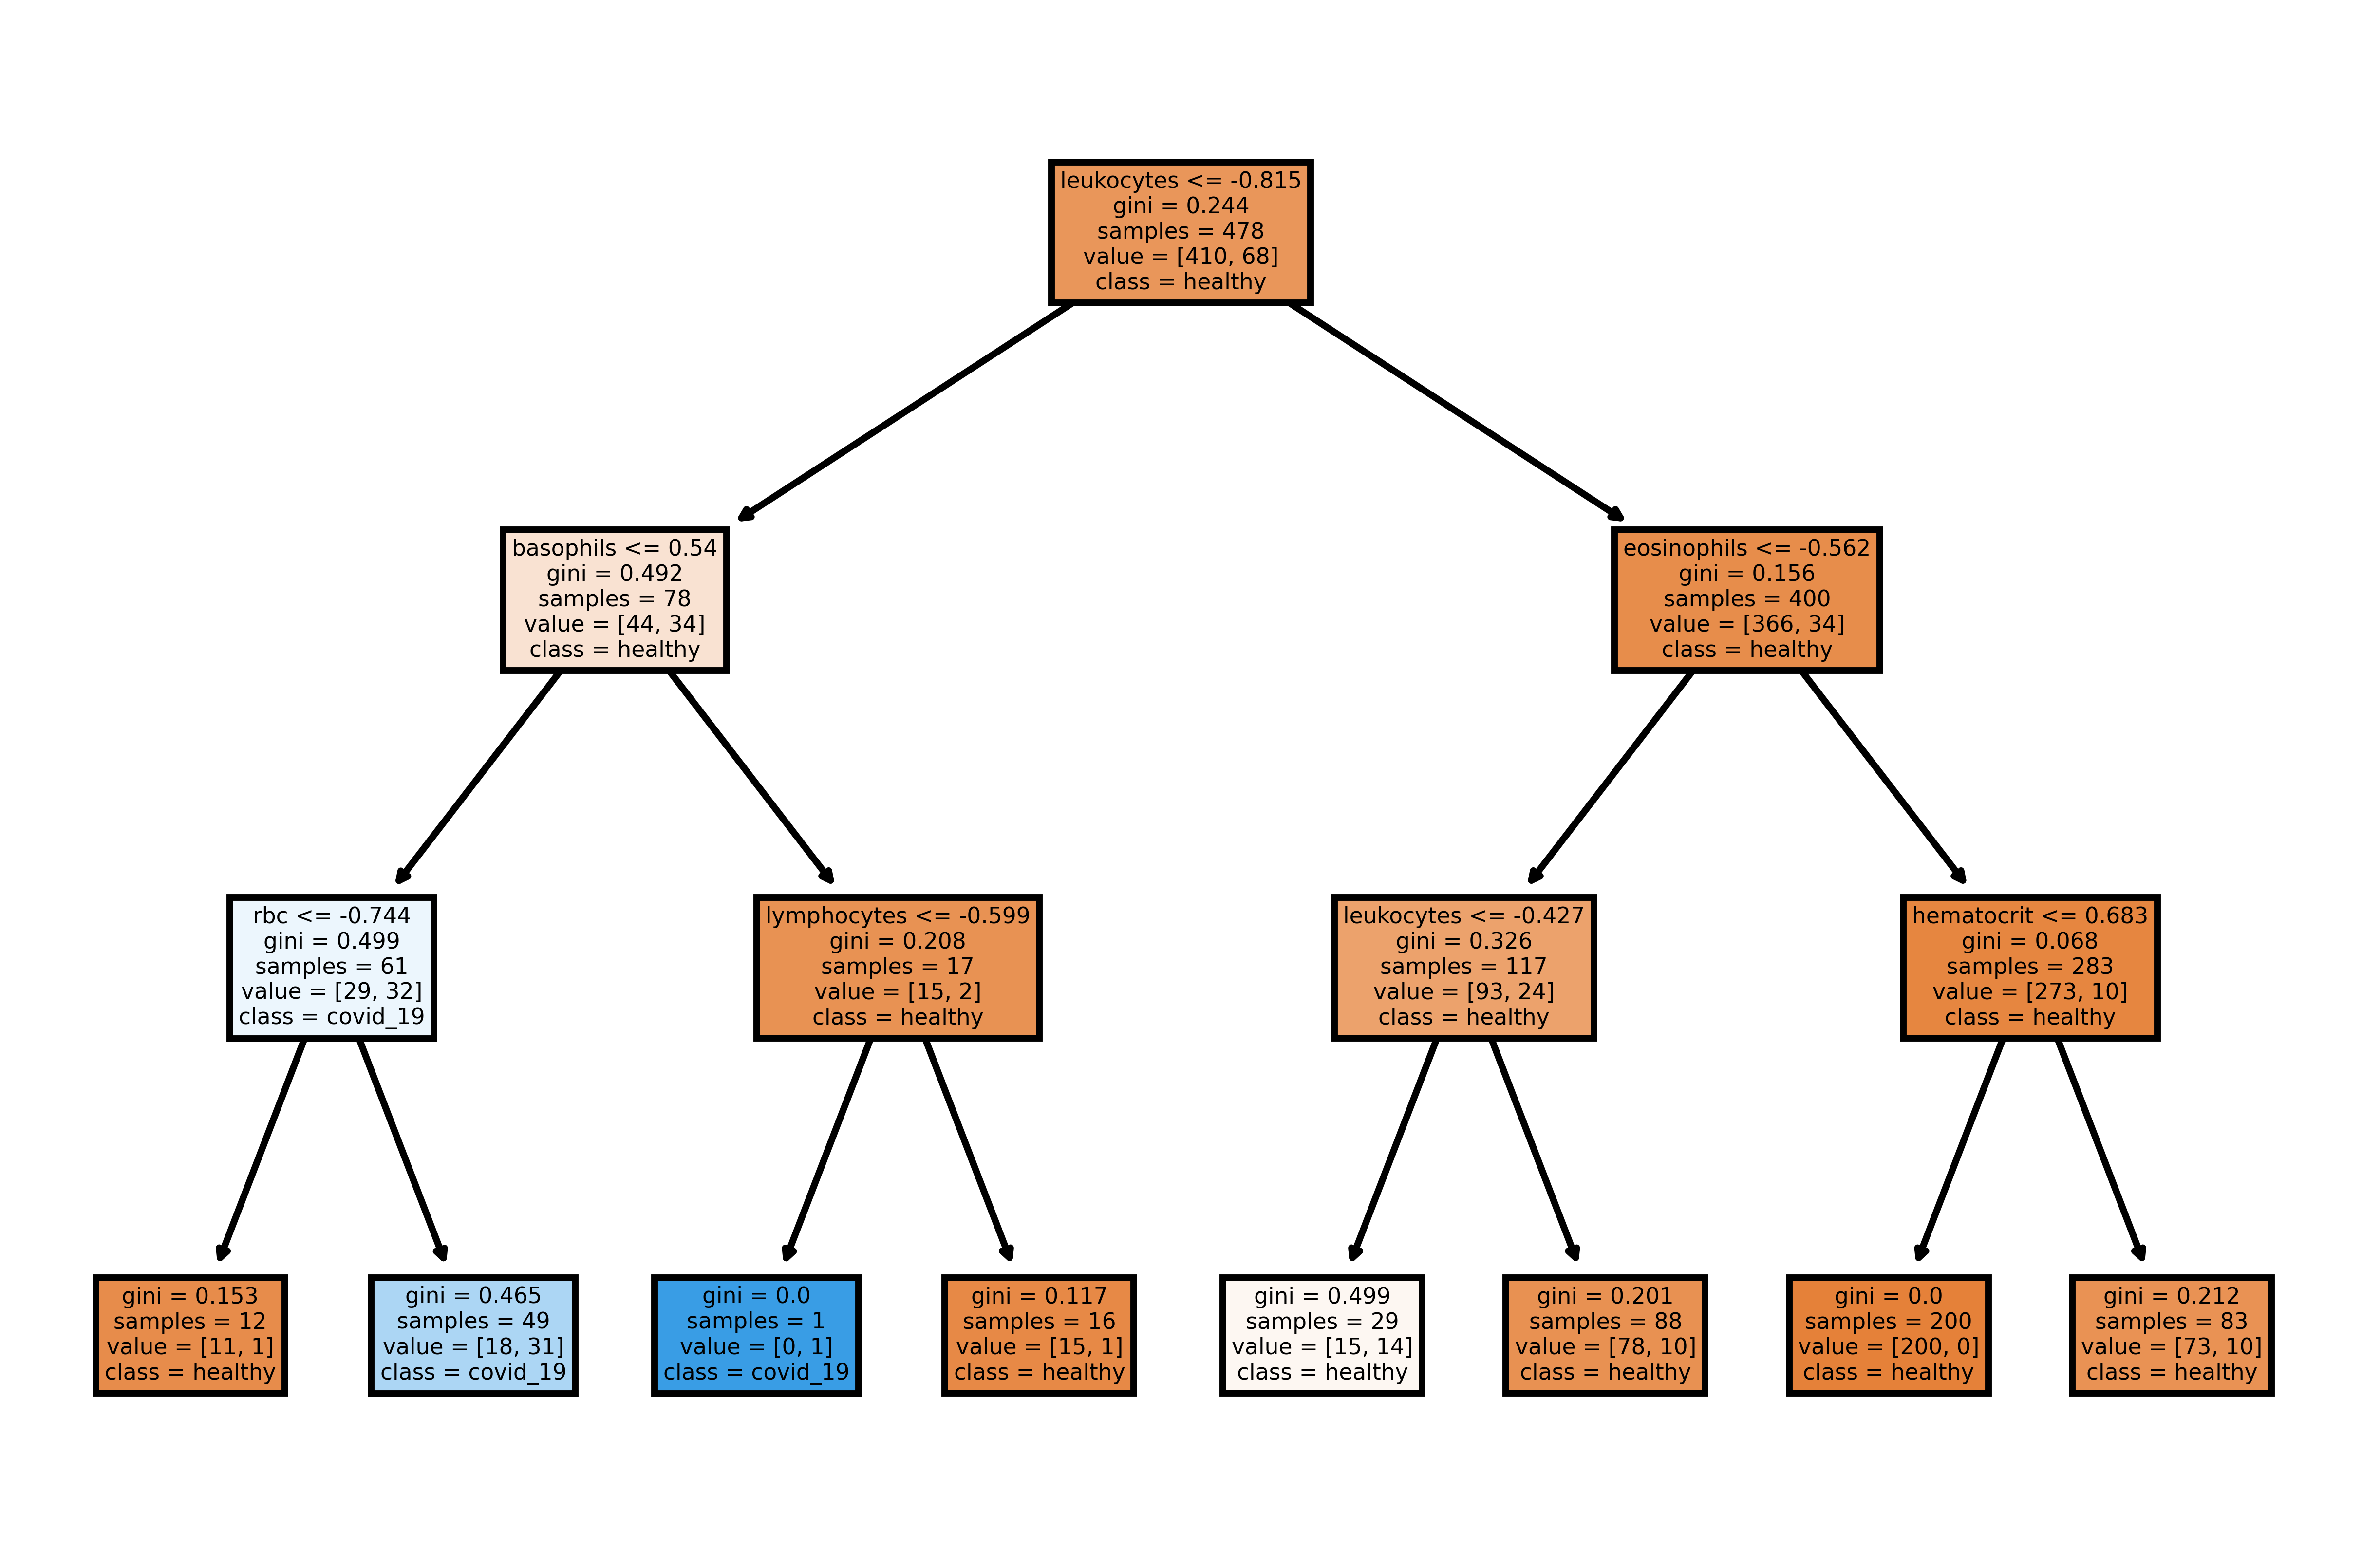

In [13]:
#Based on the depth values choose the required classifier from the list and use different set of features.
clf = list1[1]
#feature_names={0:'age',1:'Hemoglobin',2:'Mean platelet volume',3:'Lymphocytes',4:'Leukocytes',5:'MCH',6:'MCV',7:'RDW'}
#feature_names={0:'Hematocrit', 1:'Platelets', 2:'Red blood Cells',3:'MCHC',4:'Basophils',5:'Eosinophils',6:'Monocytes'}
feature_names={0:'age',1:'hematocrit',2:'hemo',3:'platelets',4:'mean_platelet_volume',5:'rbc',6:'lymphocytes',7:'MCHC',8:'leukocytes',9:'basophils',10:'MCH',11:'eosinophils',12:'MCV',13:'monocytes',14:'rdw'}
c_names={0: 'healthy', 1: 'covid_19'} 
#dot_data = tree.export_graphviz(clf_t, out_file=None, class_names=c_names) # , feature_names=feature_names 
#graph = graphviz.Source(dot_data) 
#graph.render("covid_tree") #output will be a pdf with the tree in high quality. 
#graph.render("covid_tree")
fig, axes = plt.subplots(dpi=1000)
tree.plot_tree(clf,filled=True, class_names = c_names, feature_names = feature_names)
fig.savefig('imagename.png')
#plt.show() #will make plot blurry.